# **Aprendiendo operaciones**

In [2]:
    import tensorflow as tf
    import numpy as np
    from tensorflow import keras
    import pandas as pd
    import matplotlib.pyplot as plt


In [3]:
import random
def get_random_ops(rows=10000):
    data = []
    for i in range(0, rows):
        a = random.randint(1,100)
        b = random.randint(1,100)
        suma, resta, multi, divi = random.choice([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
        ])

        if suma == 1: y = a+b
        if resta == 1: y = a-b
        if multi == 1: y = a*b
        if divi == 1: y = a/b

        data.append({
            "a":a,
            "b":b,
            "suma": suma,
            "resta": resta,
            "multi": multi,
            "divi": divi,
            "y": round(y, 4)
        })
    return data

## Tenemos un conjunto de datos llamado df que consta de características (features) y etiquetas (labels). Las características se almacenan en X, que incluye las columnas 'a', 'b', 'suma', 'resta', 'multi' y 'divi'. Las etiquetas se almacenan en y y representan los resultados de las operaciones matemáticas generadas aleatoriamente.

In [4]:
data = pd.DataFrame(get_random_ops(5000))
data [['a', 'b', 'suma', 'resta', 'multi', 'divi', 'y']].head(10)

,a,b,suma,resta,multi,divi,y
0,96,44,0,1,0,0,52.0000
1,38,78,0,1,0,0,-40.0000
2,20,47,0,1,0,0,-27.0000
3,89,75,1,0,0,0,164.0000
4,53,57,0,0,1,0,3021.0000
5,55,60,0,0,0,1,0.9167
6,99,22,0,1,0,0,77.0000
7,60,45,1,0,0,0,105.0000
8,22,95,1,0,0,0,117.0000
9,38,37,0,1,0,0,1.0000


## Pandas es una de las librerias más populares en Python para la manipulación y análisis de datos. Proporciona estructuras de datos flexibles y herramientas de análisis que son esenciales para trabajar con datos en Python.

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>,
        <Axes: title={'center': 'suma'}>],
       [<Axes: title={'center': 'resta'}>,
        <Axes: title={'center': 'multi'}>,
        <Axes: title={'center': 'divi'}>],
       [<Axes: title={'center': 'y'}>, <Axes: >, <Axes: >]], dtype=object)

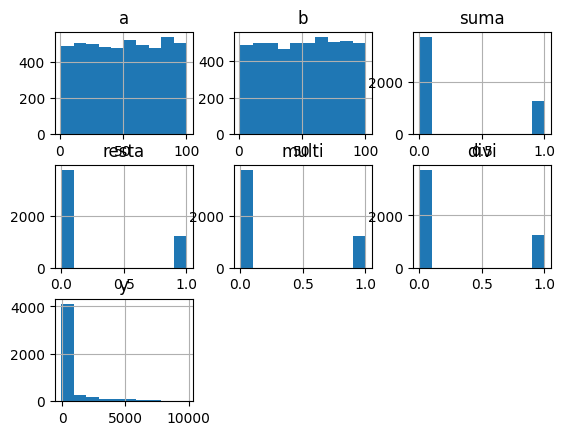

In [5]:
data.hist()
#lt.tight_layout()

El método hist() en Pandas se utiliza para crear histogramas de los datos contenidos en un DataFrame. Un histograma es una representación gráfica de la distribución de frecuencia de los valores en un conjunto de datos. Muestra cuántas veces ocurre cada valor en un rango específico (bin) y es útil para comprender la distribución de los datos y detectar patrones.



In [6]:
#Generamos el  dataset
data = get_random_ops(rows=1000)
df = pd.DataFrame(data)

# Split del dataset en features (X) y labels (y)
X = df[['a', 'b', 'suma', 'resta', 'multi', 'divi']]
y = df['y']

In [7]:
# Convertir las listas a arrays numpy
X = np.array(X)
y = np.array(y)

# Divide los datos en conjuntos de entrenamiento y validación
# Puedes ajustar el tamaño del conjunto de validación según sea necesario

split_ratio = 0.8  # 80% de datos de entrenamiento, 20% de datos de validación
split_index = int(len(X) * split_ratio)

X_train_split = X[:split_index]
y_train_split = y[:split_index]

X_val_split = X[split_index:]
y_val_split = y[split_index:]


In [8]:
# Definimos la arquitectura de la neurona

model = keras.Sequential([
    keras.layers.Dense(60, activation='relu', input_shape=(6,)),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])


Input de 6 características como datos de entrada de la neurona.
Luego la  red neuronal consta de una capa con 60 neuronas, seguida de otra capa intermedia con 30 neuronas, y una capa de salida con 1 neurona para problemas de regresión. La función de activación ReLU se usa en ambas capas. La red neuronal se entrena para predecir un valor numérico basado en los datos de entrada.

In [9]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                420       
                                                                 
 dense_1 (Dense)             (None, 30)                1830      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Entrenamos el model
print(f"Comenzamos a entrenar el modelo")

Mi_historial = model.fit(X_train_split , y_train_split , epochs=1000,  validation_data=(X_val_split, y_val_split), verbose=0)

print(f"Modelo entrenado")


Comenzamos a entrenar el modelo
Modelo entrenado


Con 1000 datos de entrada y 1000 épocas da resultados regulares, con 5000 datos de entrada y 2000 épocas da bastante mejor.

In [12]:
# Evaluamos la función de pérdida y graficamos
loss, mse = model.evaluate(X, y)
print(f"Mean Absolute Error on Training Data: {mse}")

32/32 [==============================] - 0s 3ms/step - loss: 586.9661 - mse: 586.9661
Mean Absolute Error on Training Data: 586.966064453125


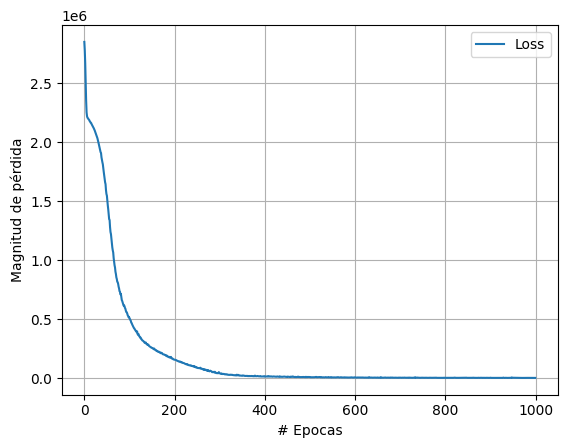

In [13]:
plt.xlabel("# Epocas")
plt.ylabel("Magnitud de pérdida")
plt.grid()
plt.plot(Mi_historial.history["loss"], label='Loss')
plt.legend()

In [14]:
# Hacemos predicciones en el conjunto de entrenamiento
predictions = model.predict(X_train_split)

# Imprimir los valores predichos y los valores correctos
for i in range(len(predictions)):
    valor_correcto = y_train_split[i]
    valor_predicho = predictions[i][0]
    print(f"Valor Correcto: {valor_correcto:.3f} - Valor Predicho: {valor_predicho:.3f}")

# Calcular el error cuadrático medio en el conjunto de entrenamiento
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train_split, predictions)
print(f"Error Cuadrático Medio (MSE) en el conjunto de entrenamiento: {mse:.2f}")


25/25 [==============================] - 0s 1ms/step
Valor Correcto: 3120.000 - Valor Predicho: 3081.887
Valor Correcto: 208.000 - Valor Predicho: 213.267
Valor Correcto: 27.000 - Valor Predicho: 22.217
Valor Correcto: 151.000 - Valor Predicho: 163.551
Valor Correcto: 2.302 - Valor Predicho: -18.463
Valor Correcto: 0.549 - Valor Predicho: 11.577
Valor Correcto: -36.000 - Valor Predicho: -43.614
Valor Correcto: 114.000 - Valor Predicho: 114.614
Valor Correcto: 89.000 - Valor Predicho: 68.713
Valor Correcto: 2945.000 - Valor Predicho: 2945.408
Valor Correcto: 168.000 - Valor Predicho: 160.817
Valor Correcto: 67.000 - Valor Predicho: 51.541
Valor Correcto: 0.462 - Valor Predicho: -1.529
Valor Correcto: 72.000 - Valor Predicho: 64.580
Valor Correcto: 1.692 - Valor Predicho: 10.626
Valor Correcto: 18.000 - Valor Predicho: 24.277
Valor Correcto: 181.000 - Valor Predicho: 174.868
Valor Correcto: 118.000 - Valor Predicho: 128.199
Valor Correcto: -16.000 - Valor Predicho: -18.067
Valor Correcto

In [15]:
# Hacemos predicciones en el conjunto de validacion
predictions = model.predict(X_val_split)

# Imprimir los valores predichos y los valores correctos
for i in range(len(predictions)):
    valor_correcto = y_val_split[i]
    valor_predicho = predictions[i][0]
    print(f"Valor Correcto: {valor_correcto:.3f} - Valor Predicho: {valor_predicho:.3f}")

# Calcular el error cuadrático medio en el conjunto de validación
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val_split, predictions)
print(f"Error Cuadrático Medio (MSE) en el conjunto de validación: {mse:.2f}")


7/7 [==============================] - 0s 2ms/step
Valor Correcto: 0.179 - Valor Predicho: -17.143
Valor Correcto: 0.701 - Valor Predicho: -11.332
Valor Correcto: 0.256 - Valor Predicho: -8.060
Valor Correcto: 110.000 - Valor Predicho: 236.942
Valor Correcto: 14.000 - Valor Predicho: 13.839
Valor Correcto: 5.000 - Valor Predicho: 5.073
Valor Correcto: 3416.000 - Valor Predicho: 3325.027
Valor Correcto: 22.000 - Valor Predicho: 20.734
Valor Correcto: -74.000 - Valor Predicho: -75.586
Valor Correcto: 73.000 - Valor Predicho: 72.133
Valor Correcto: 24.000 - Valor Predicho: 13.540
Valor Correcto: -31.000 - Valor Predicho: -33.941
Valor Correcto: 5040.000 - Valor Predicho: 5071.245
Valor Correcto: 0.653 - Valor Predicho: 3.115
Valor Correcto: 5336.000 - Valor Predicho: 5308.486
Valor Correcto: 46.000 - Valor Predicho: 47.590
Valor Correcto: 1.148 - Valor Predicho: -2.140
Valor Correcto: 0.250 - Valor Predicho: -2.929
Valor Correcto: 1584.000 - Valor Predicho: 1586.583
Valor Correcto: 89.000

25/25 [==============================] - 0s 1ms/step


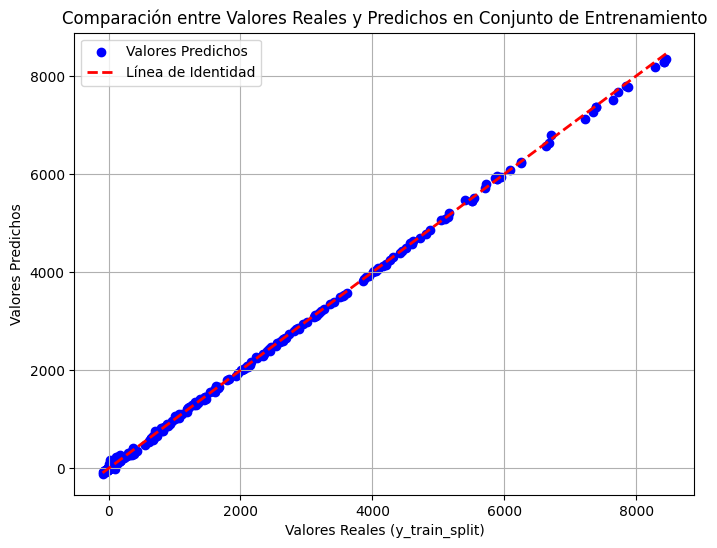

In [16]:
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de entrenamiento
predictions_train = model.predict(X_train_split)

# Crear un gráfico de dispersión para comparar valores reales y predichos en el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
plt.scatter(y_train_split, predictions_train, c='blue', label='Valores Predichos')
plt.plot([min(y_train_split), max(y_train_split)], [min(y_train_split), max(y_train_split)], linestyle='--', color='red', linewidth=2, label='Línea de Identidad')
plt.xlabel('Valores Reales (y_train_split)')
plt.ylabel('Valores Predichos')
plt.legend()
plt.title('Comparación entre Valores Reales y Predichos en Conjunto de Entrenamiento')
plt.grid(True)
plt.show()


7/7 [==============================] - 0s 3ms/step


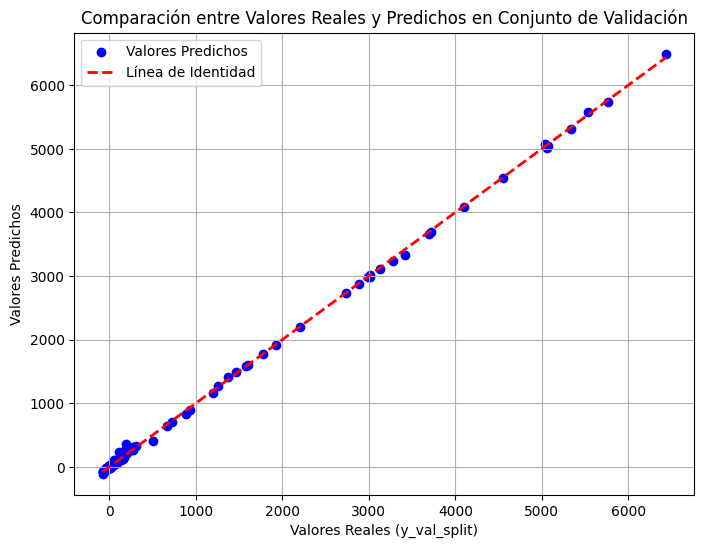

In [17]:
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de validación
predictions_val = model.predict(X_val_split)

# Crear un gráfico de dispersión para comparar valores reales y predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_val_split, predictions_val, c='blue', label='Valores Predichos')
plt.plot([min(y_val_split), max(y_val_split)], [min(y_val_split), max(y_val_split)], linestyle='--', color='red', linewidth=2, label='Línea de Identidad')
plt.xlabel('Valores Reales (y_val_split)')
plt.ylabel('Valores Predichos')
plt.legend()
plt.title('Comparación entre Valores Reales y Predichos en Conjunto de Validación')
plt.grid(True)
plt.show()


In [ ]:
# Hacer predicciones en el conjunto de entrenamiento
predictions = model.predict(X_train_split)

# Lista de operaciones
operaciones = []

# Imprimir las operaciones, los valores correctos y los valores predichos
for i in range(len(predictions)):
    operacion = identificar_operacion(X_train_split[i])
    operaciones.append(operacion)
    valor_correcto = y_train_split[i]
    valor_predicho = predictions[i][0]
    print(f"Operación: {operacion} - Valor Correcto: {valor_correcto:.2f} - Valor Predicho: {valor_predicho:.2f}")

# Calcular el error cuadrático medio en el conjunto de entrenamiento
mse = tf.keras.losses.mean_squared_error(y_train_split, predictions)
print(f"Error Cuadrático Medio (MSE) en el conjunto de entrenamiento: {mse:.2f}")


25/25 [==============================] - 0s 3ms/step


IndexError: ignored